In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/diamonds.csv")

# **Data Description**

# **What is the size of data?**

In [4]:
df.shape

(219703, 26)

# **How does the data look like?**

In [5]:
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


# **What are the datatypes of columns?**

In [6]:
df.dtypes

Unnamed: 0                       int64
cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fluor_intensity                 object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price        

# **Does the data contain missing values?**

In [7]:
print(df.isnull().sum())

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64


# **Are there any duplicates?**

In [8]:
df.duplicated().sum()

0

# **How does the data look like mathematically?**

In [9]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


# **What are the number of unique values in each column?**

In [10]:
df.nunique()

Unnamed: 0                     219703
cut                                11
color                              11
clarity                            11
carat_weight                      878
cut_quality                         6
lab                                 3
symmetry                            5
polish                              5
eye_clean                           5
culet_size                          9
culet_condition                     4
depth_percent                     534
table_percent                     235
meas_length                      1415
meas_width                       1155
meas_depth                        852
girdle_min                         10
girdle_max                         10
fluor_color                         6
fluor_intensity                     8
fancy_color_dominant_color         13
fancy_color_secondary_color        11
fancy_color_overtone                9
fancy_color_intensity              10
total_sales_price               22202
dtype: int64

# **Data Exploration**

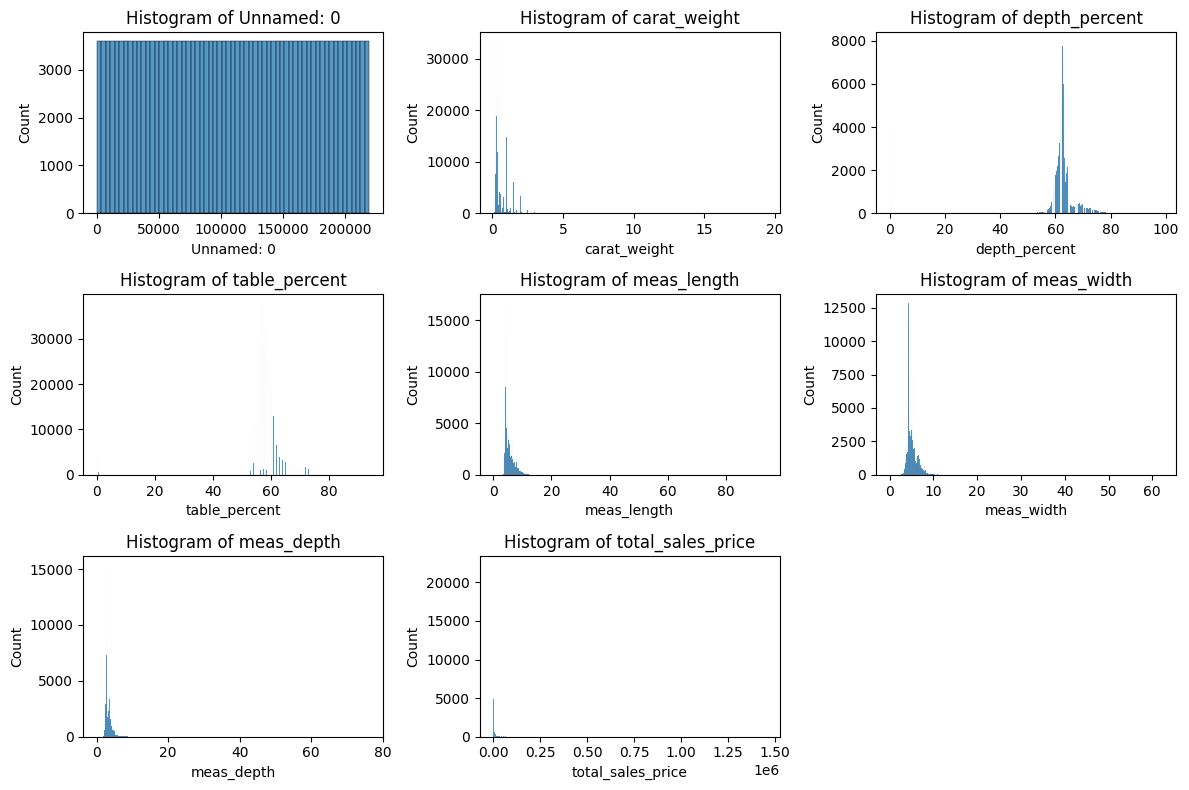

In [11]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

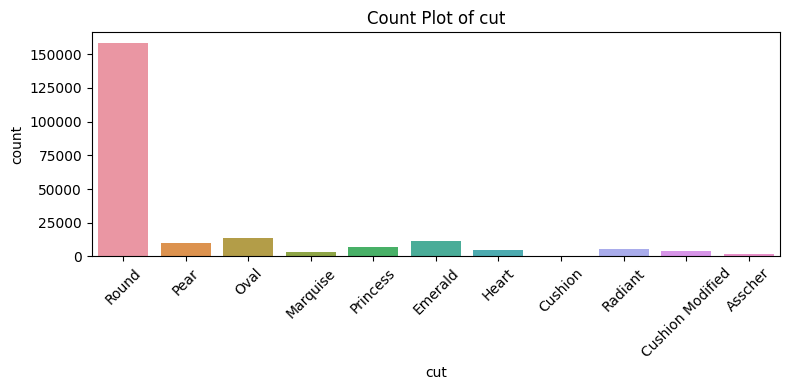

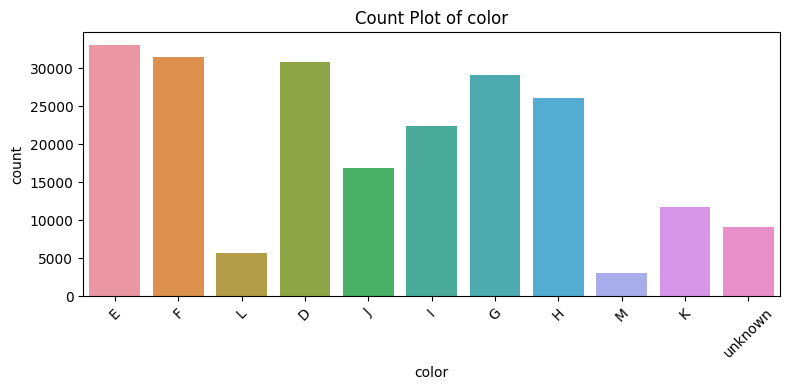

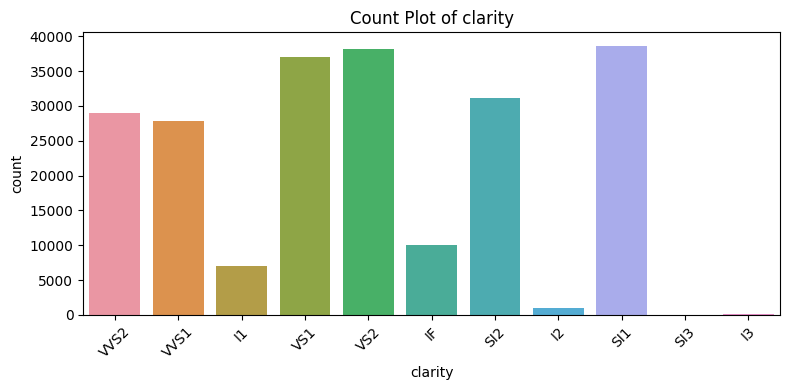

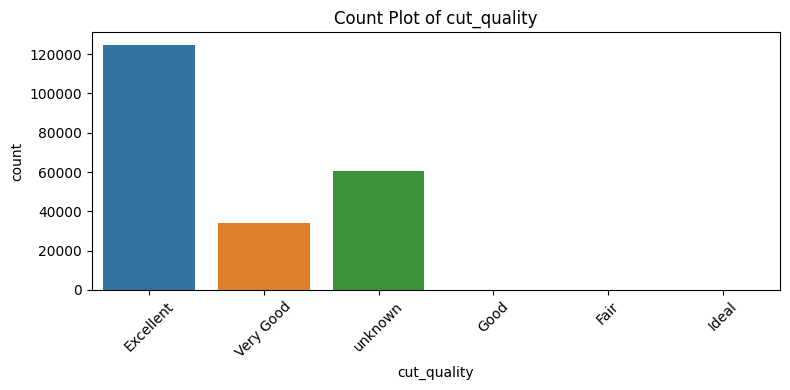

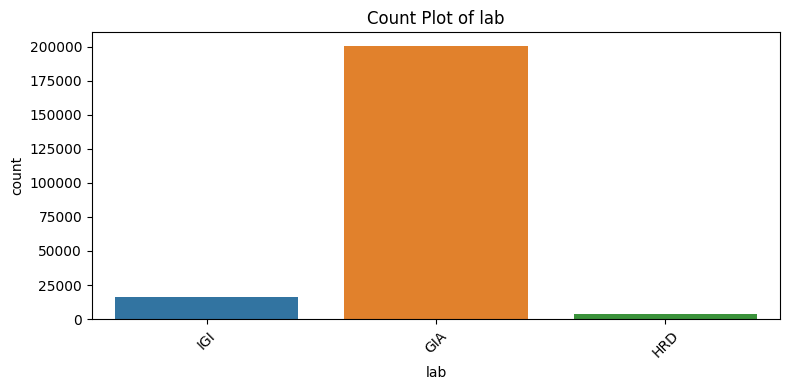

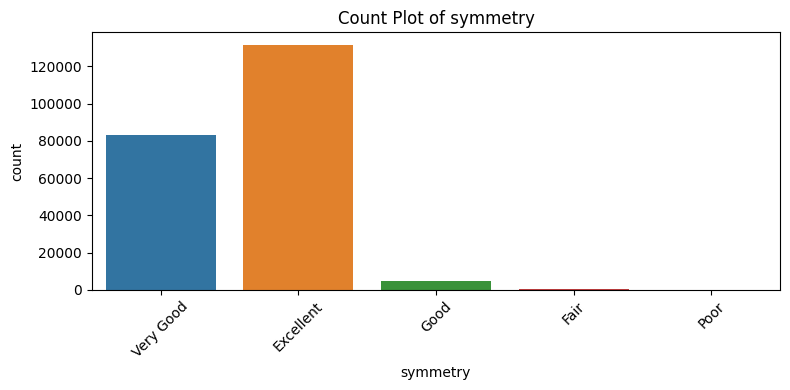

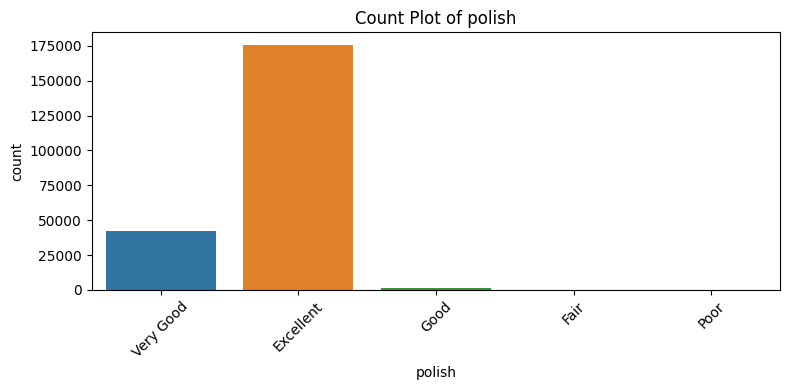

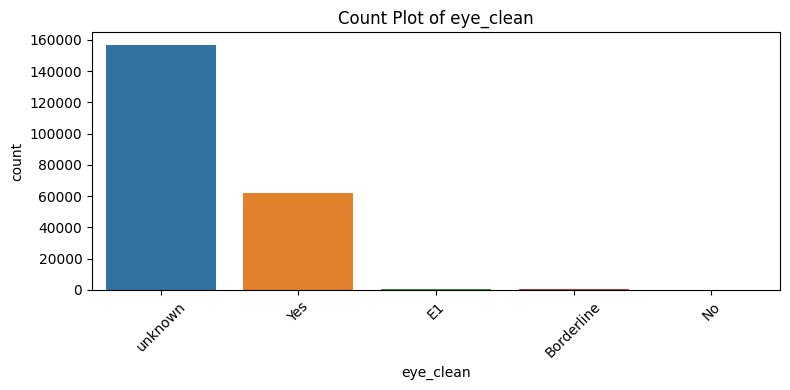

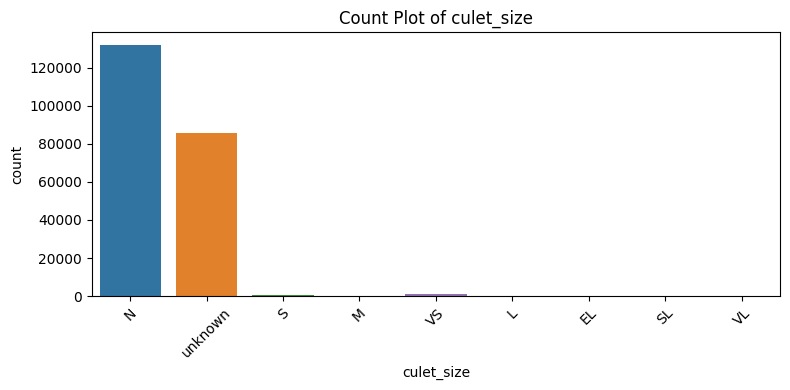

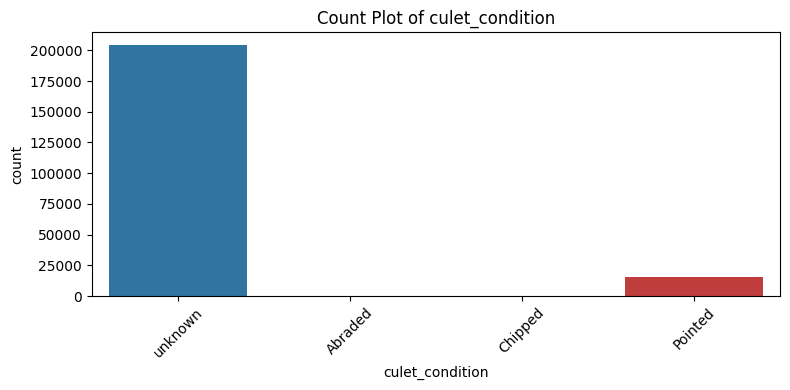

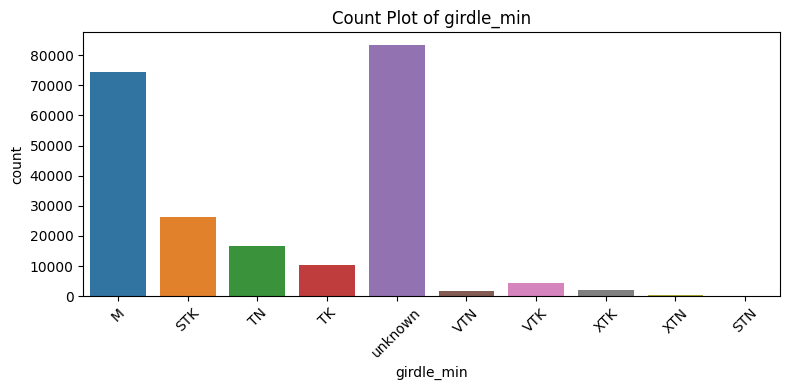

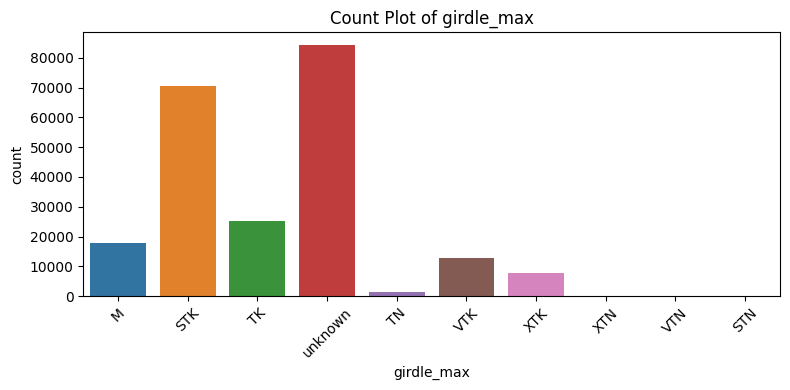

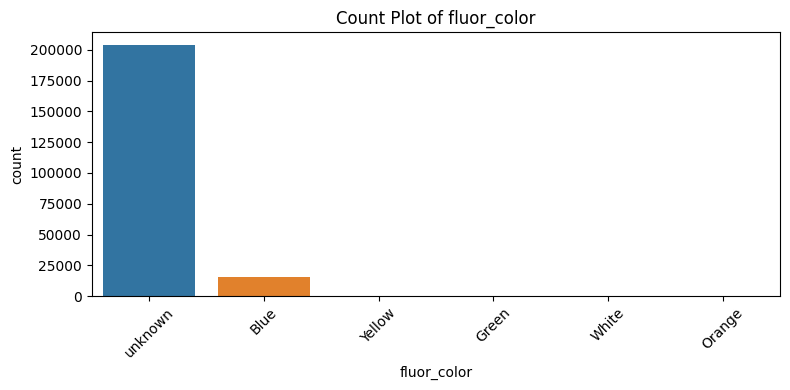

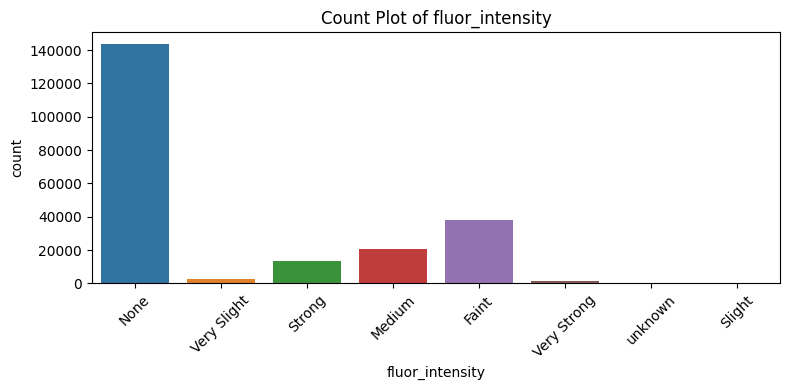

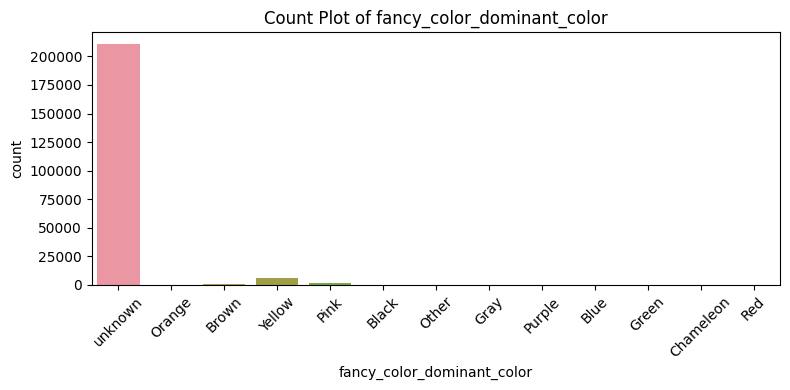

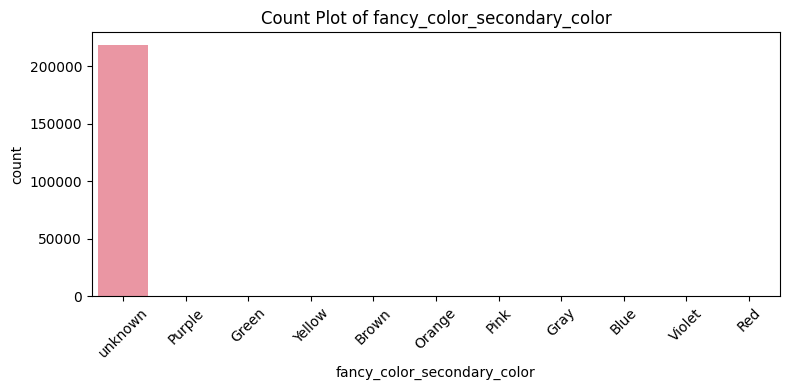

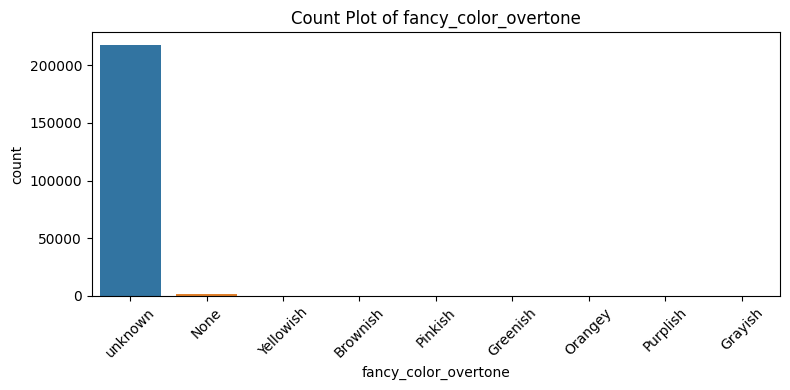

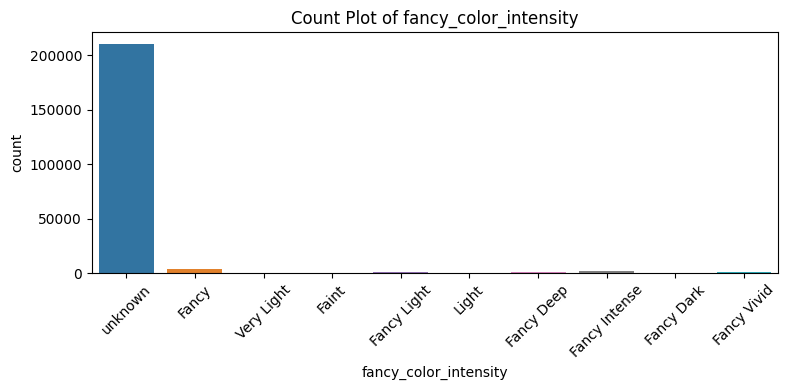

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 8))
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# **Detecting and Handling Outliers**

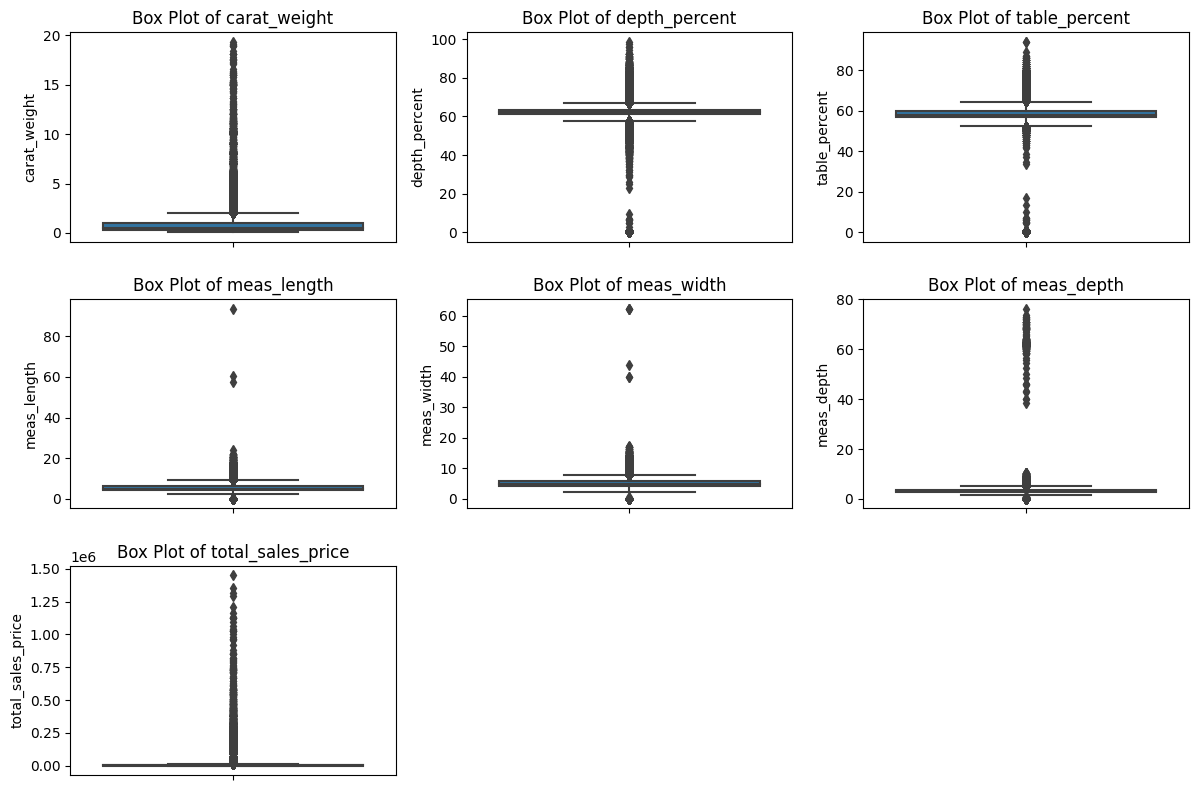

In [13]:
numerical_columns = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [14]:
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [15]:
for column in numerical_columns:
    handle_outliers(column)

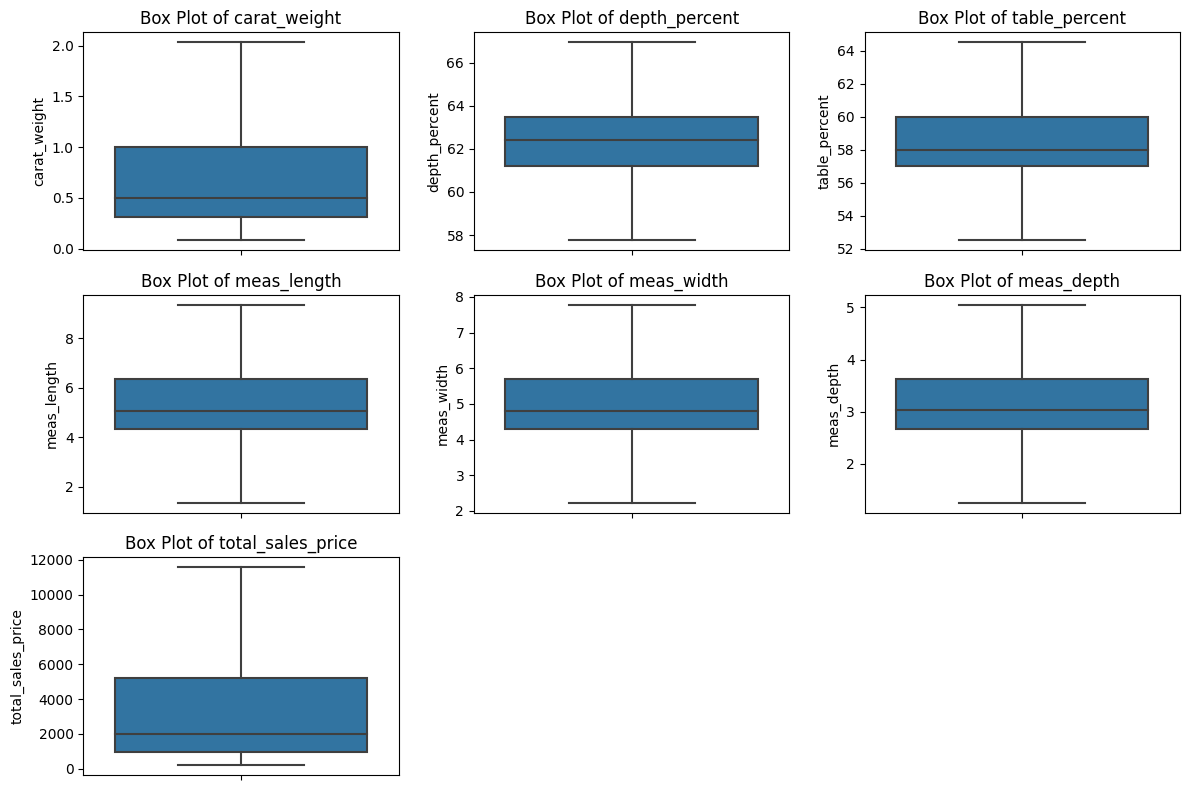

In [16]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [17]:
df.dtypes

Unnamed: 0                       int64
cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fluor_intensity                 object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price        

In [18]:
df.shape

(219703, 26)

# **Encoding of Variables**

In [19]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# **Predicting carat weight**

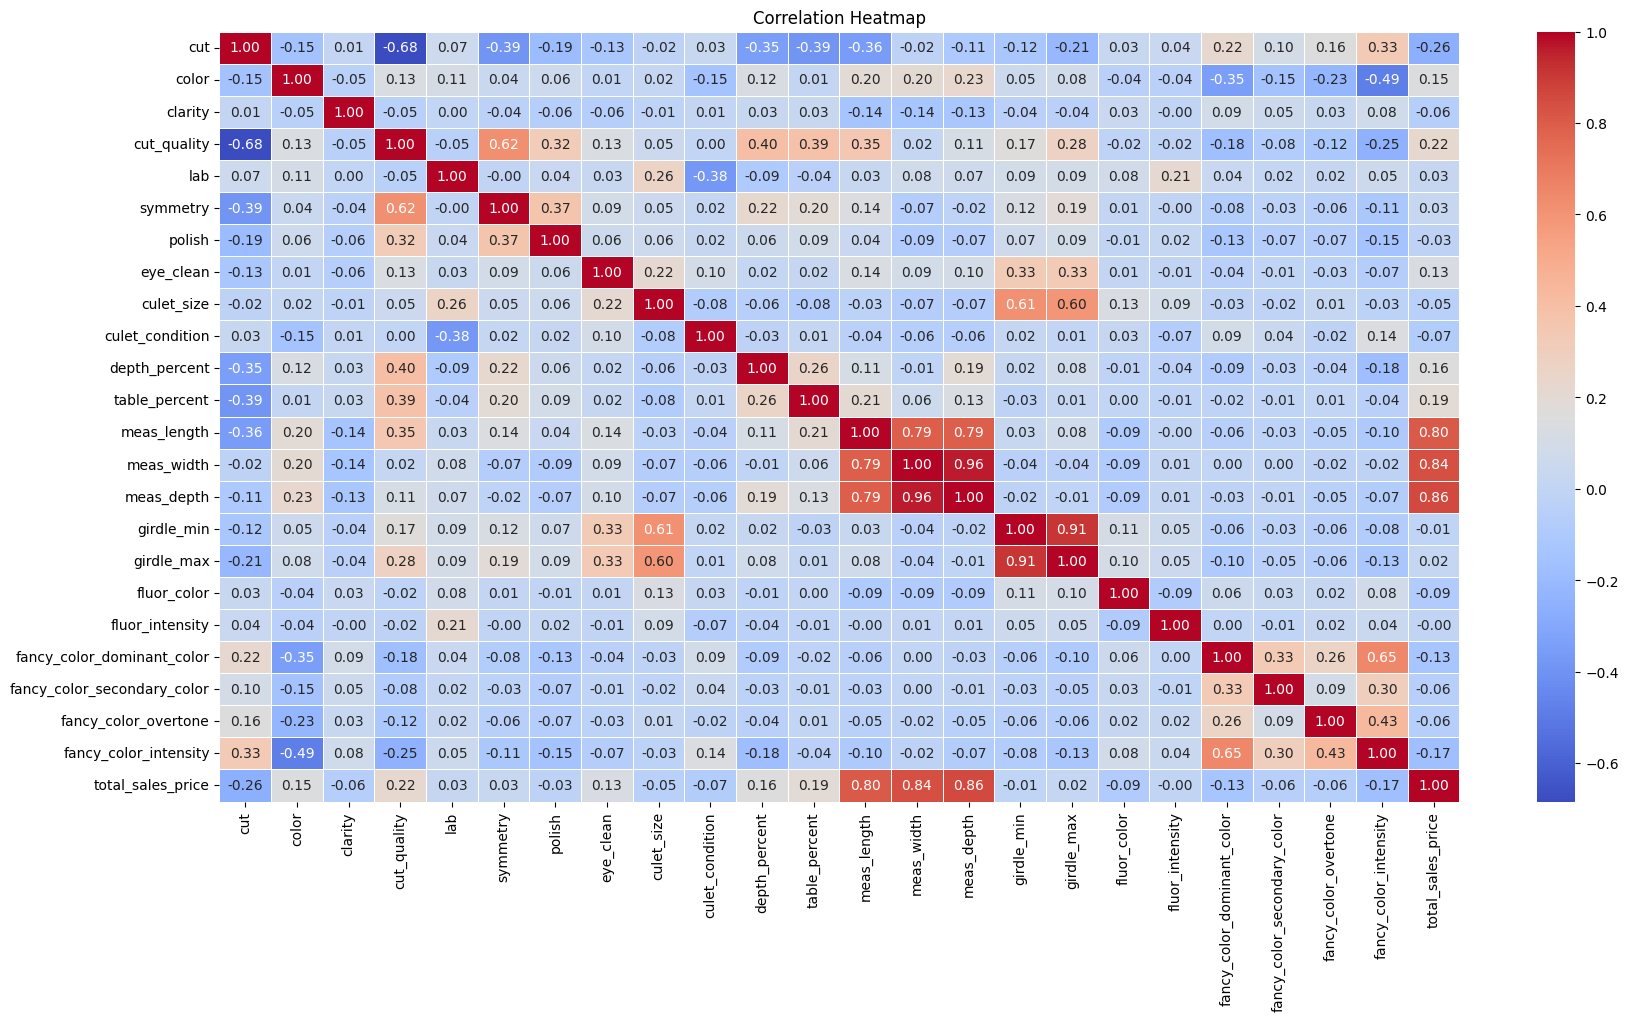

In [20]:
df= df.drop(df.columns[0], axis=1)
df1 = df.drop('carat_weight', axis=1)
correlation_matrix = df1.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [21]:
df = df.drop('meas_length', axis=1)
df = df.drop('meas_depth', axis=1)
df = df.drop('meas_width', axis=1)

In [22]:
df.shape

(219703, 22)

# **Splitting Data**

In [23]:
X = df.drop(columns=['carat_weight'])
y = df['carat_weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scaling Features**

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Linear Regression Model**

In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.10194981743953807
Mean Squared Error (MSE): 0.028400449019517042
R-squared (R2): 0.888994569632477


# **Polynomial Regression Model (Degree=2)**

In [27]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Mean Absolute Error (MAE): {mae_poly}")
print(f"Polynomial Regression Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Regression R-squared (R2): {r2_poly}")

Polynomial Regression Mean Absolute Error (MAE): 0.0848152017052377
Polynomial Regression Mean Squared Error (MSE): 0.020685009425291494
Polynomial Regression R-squared (R2): 0.9191509834287191


# **Polynomial Regression Model (Degree=3)**

In [28]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression Mean Absolute Error (MAE): {mae_poly}")
print(f"Polynomial Regression Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Regression R-squared (R2): {r2_poly}")

Polynomial Regression Mean Absolute Error (MAE): 18863.794338007083
Polynomial Regression Mean Squared Error (MSE): 2806363370366.371
Polynomial Regression R-squared (R2): -10968896072067.82
